In [1]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [2]:
monthsvt = pd.read_csv("monthlylaborvt.csv")
quartersvt = pd.read_csv("quarterlylaborvt.csv")
annualvt = pd.read_csv("annuallaborvt.csv")

In [3]:
monthscnty = pd.read_csv("monthlylaborcnty.csv")
quarterscnty = pd.read_csv("quarterlylaborcnty.csv")
annualcnty = pd.read_csv("annuallaborcnty.csv")

## Seasonality

In a state with strong variety between seasons, it would not be surprising if employment numbers varied based on the month. The real question is if the pattern is the same between each county of if counties have distinctly different behavior. First a look at the months aggragated for 17 years grouped by southern and mid-Vermont counties. Lamoille County contains multiple ski resorts and it shows.

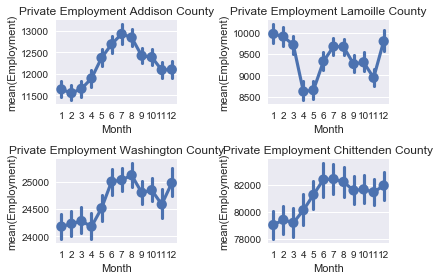

In [4]:
plt.subplot(2, 2, 1)
data = monthscnty[(monthscnty['County'] == 'Addison') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Addison County')
plt.xlabel('Month')

plt.subplot(2, 2, 2)
data = monthscnty[(monthscnty['County'] == 'Lamoille') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Lamoille County')
plt.xlabel('Month')

plt.subplot(2, 2, 3)
data = monthscnty[(monthscnty['County'] == 'Washington') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Washington County')
plt.xlabel('Month')

plt.subplot(2, 2, 4)
data = monthscnty[(monthscnty['County'] == 'Chittenden') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Chittenden County')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

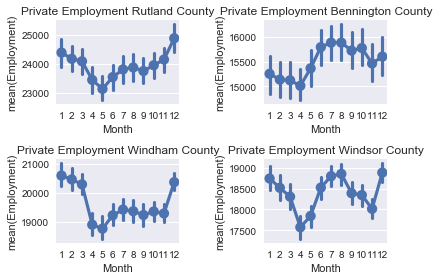

In [5]:
plt.subplot(2, 2, 1)
data = monthscnty[(monthscnty['County'] == 'Rutland') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Rutland County')
plt.xlabel('Month')

plt.subplot(2, 2, 2)
data = monthscnty[(monthscnty['County'] == 'Bennington') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Bennington County')
plt.xlabel('Month')

plt.subplot(2, 2, 3)
data = monthscnty[(monthscnty['County'] == 'Windham') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Windham County')
plt.xlabel('Month')

plt.subplot(2, 2, 4)
data = monthscnty[(monthscnty['County'] == 'Windsor') & (monthscnty['Type'] == 'Private ownership')]
sns.pointplot(x='Month_Number', y='Employment', data=data)
plt.title ('Private Employment Windsor County')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

## Trend of 17 years and the Crash of 2008

Now that we have a feeling for the seasonal trending taking a line plot across all time will help show if there are any specific spikes in the data across the years. Unsuprisingly the crash in 2008 had a distinct impact but what is interesting is that for all the mid-Vermont counties the growth has been consistant if not better than pre-crash, and for southern-Vermont those counties did not recover at the same rate, or in some cases, at all.

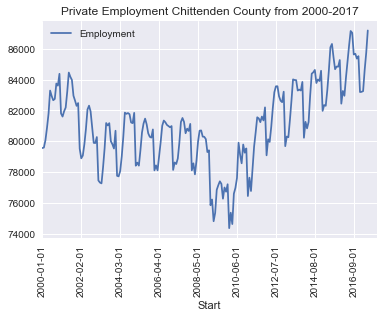

In [6]:
data = monthscnty[(monthscnty['County'] == 'Chittenden') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Chittenden County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

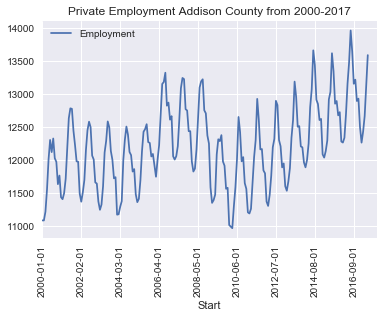

In [7]:
data = monthscnty[(monthscnty['County'] == 'Addison') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Addison County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

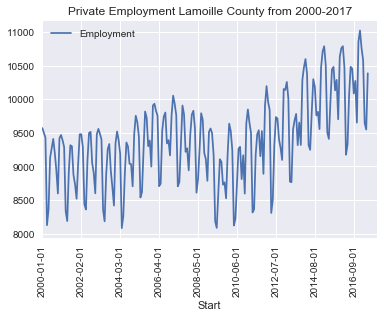

In [8]:
data = monthscnty[(monthscnty['County'] == 'Lamoille') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Lamoille County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

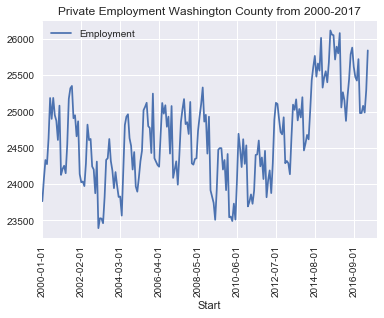

In [9]:
data = monthscnty[(monthscnty['County'] == 'Washington') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Washington County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

### Southern Vermont

Here we see the trend of the devestating impact of the crash on Southern Vermont. Windsor is the only county that seems to have much of an upward growth trend.

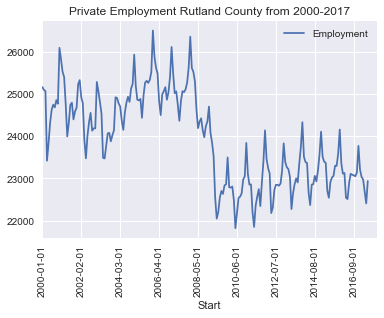

In [10]:
data = monthscnty[(monthscnty['County'] == 'Rutland') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Rutland County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

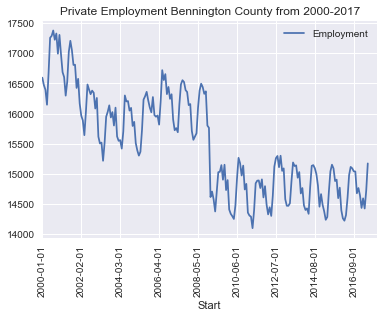

In [11]:
data = monthscnty[(monthscnty['County'] == 'Bennington') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Bennington County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

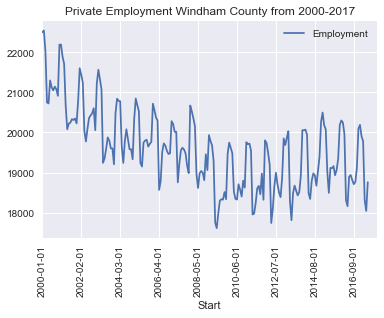

In [12]:
data = monthscnty[(monthscnty['County'] == 'Windham') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Windham County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

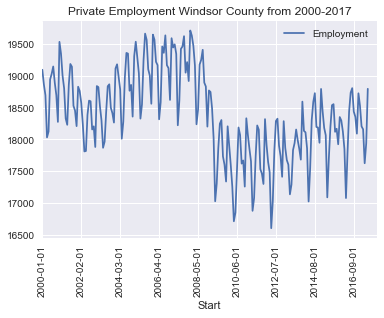

In [13]:
data = monthscnty[(monthscnty['County'] == 'Windsor') & (monthscnty['Type'] == 'Private ownership')]
data = data.sort_values(by='Start')
data.plot(x='Start', y='Employment')
plt.title ('Private Employment Windsor County from 2000-2017')
plt.xticks(rotation=90)
plt.show()

## Types of Industry

This dataset has a lot of different industry types broken out in a hierachrical structure. I will create seperate lists of types at each level for easier parsing. 

* Total Covered -  all ownerships is the total for everything
* Level 1 is made up of Private Ownership, Federal, State and Local Government. 
* Level 2 is a subset of Private Ownership made of Goods Producing Domain and Service Providing Domains
* Level 3 is composed of Supersectors for specific types of industry (Construction supersector, Professional and Business Services supersector, etc)
* Level 4 is a subset of each Supersector into specific fields (Retail trade, Non-Durable Goods manufacturing, Administrative and waste services, etc)

It is important to note that not every Supersector has a Level 4 subset, 'Construction supersector','Other services, except public administration supersector', 'Unspecified industry supersector' and 'Information supersector' are not broken down into that level. Level 4 is more for specific deeper dives into an field rather than comprehensive summation.

Definitions for these can be found here https://www.census.gov/eos/www/naics/2017NAICS/2017_NAICS_Manual.pdf

In [14]:
total = ['Total Covered -  all ownerships']

level1 = ['Private ownership','Federal Government', 'State government', 'Local government']

level2 = ['Goods Producing domain','Service Providing domain']

level3 = ['Natural Resources and Mining supersector', 'Construction supersector', 'Manufacturing supersector',
          'Trade, Transportation, and Utilities supersector','Information supersector', 
          'Financial Activities supersector', 'Professional and Business Services supersector',
          'Education and Health Services supersector', 'Leisure and Hospitality supersector',
          'Other services, except public administration supersector', 'Unspecified industry supersector']

level4 = ['Agriculture, forestry, fishing and hunting', 'Mining', 'Durable Goods manufacturing', 
          'Non-Durable Goods manufacturing', 'Wholesale trade', 'Retail trade', 'Transportation and warehousing',
          'Utilities', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional and technical services', 
          'Management of companies and enterprises', 'Administrative and waste services', 'Educational services',
          'Health care and social assistance', 'Arts, entertainment, and recreation', 'Accommodation and food services']

## Private and Government

Unsurpingly the government does not fluxtuate at the same amount as private employment with economic events. It would be interesting to contrast and compare this with a larger state like California and see if the same trends hold true.

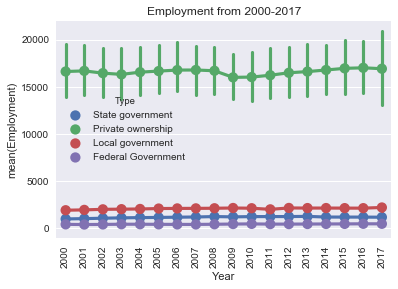

In [15]:
data = monthscnty[(monthscnty['Type'].isin(level1))]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Employment from 2000-2017')
plt.xticks(rotation=90)
plt.show()

## Level 1: Services and Goods

Even just since 2000 the changes to the economic nature of Vermont is obvious. Services, instead of creating goods, is becoming the dominant kind of employment. The first chart shows year to year, the verticle line represents the range of values for that year. Manufacturing is steadily decreasing and Services increasing.

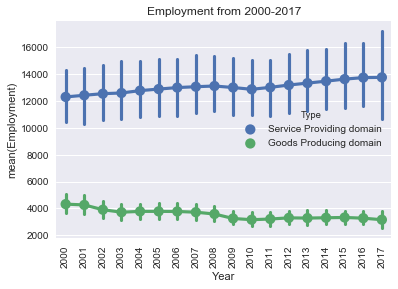

In [16]:
data = monthscnty[(monthscnty['Type'].isin(level2))]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Employment from 2000-2017')
plt.xticks(rotation=90)
plt.show()

A quick look at boxplots for each type shows that the box, or the 25th to 75th percentile is fairly steady except a band of outliers from Chittenden County high above the rest. 

In [17]:
level3service = ['Trade, Transportation, and Utilities supersector','Information supersector', 
                 'Financial Activities supersector', 'Professional and Business Services supersector', 
                 'Education and Health Services supersector', 'Leisure and Hospitality supersector', 
                 'Other services, except public administration supersector', 'Unspecified industry supersector']
level3goods = ['Natural Resources and Mining supersector', 'Construction supersector', 'Manufacturing supersector']

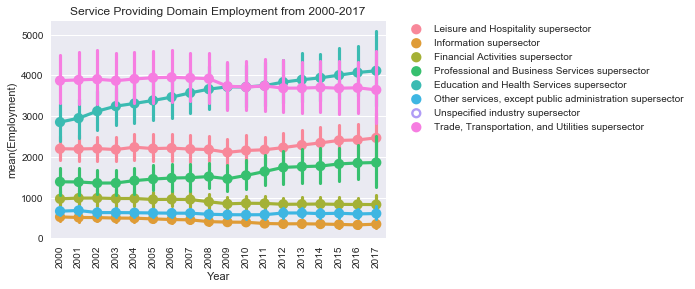

In [18]:
data = monthscnty[(monthscnty['Type'].isin(level3service))]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Service Providing Domain Employment from 2000-2017')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

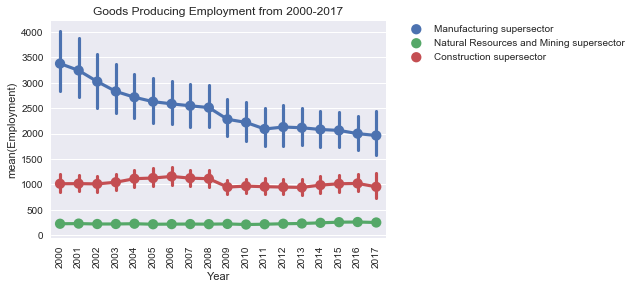

In [19]:
data = monthscnty[(monthscnty['Type'].isin(level3goods))]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Goods Producing Employment from 2000-2017')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Level 2: Supersector Drivers

If Service is growing what are the driving industies for that growth? From the charts above it is not hard to pick a couple of supersectors that are growing. Leisure/Hospitality, Education/Health and Professional Services seem to have an upward trend. 

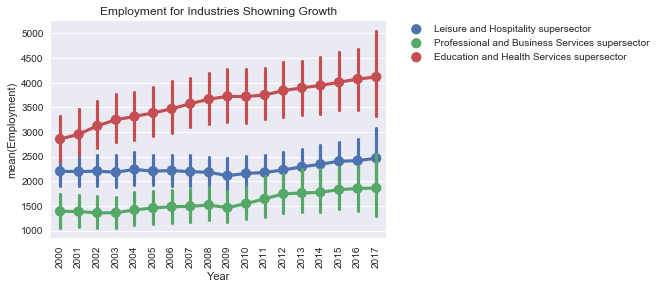

In [20]:
data = monthscnty[(monthscnty['Type'] == 'Leisure and Hospitality supersector') |
                  (monthscnty['Type'] == 'Education and Health Services supersector') |
                  (monthscnty['Type'] == 'Professional and Business Services supersector')]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Employment for Industries Showning Growth')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Health and Education 
The chart above seem to show the most overall growth, because the data breaks it into two lower levels a quick plot shows that the health care is the one showing true growth.

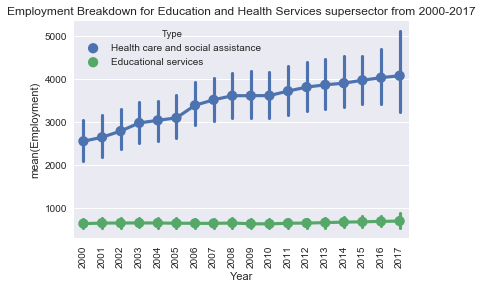

In [21]:
data = monthscnty[(monthscnty['Type'] == 'Educational services') |
                  (monthscnty['Type'] == 'Health care and social assistance')
                 ]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Employment Breakdown for Education and Health Services supersector from 2000-2017')
plt.xticks(rotation=90)
plt.show()

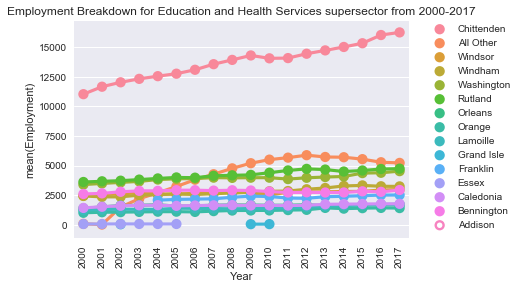

In [22]:
data = monthscnty[(monthscnty['Type'] == 'Health care and social assistance')]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='County', data=data)
plt.title ('Employment Breakdown for Education and Health Services supersector from 2000-2017')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [23]:
health = monthscnty[(monthscnty['Type'] == 'Health care and social assistance')]
health = health[['County', 'Employment']].groupby(['County'], as_index=False).mean().sort_values(by='Employment',ascending=0)
health

,County,Employment
4,Chittenden,13661.571429
11,Rutland,4214.319048
1,All Other,3980.842857
12,Washington,3918.380952
2,Bennington,2805.328571
13,Windham,2779.885714
14,Windsor,2704.790476
6,Franklin,2330.578231
3,Caledonia,1643.438095
10,Orleans,1626.942857


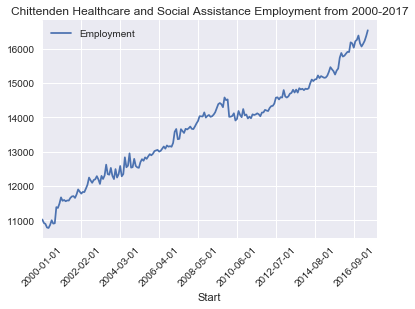

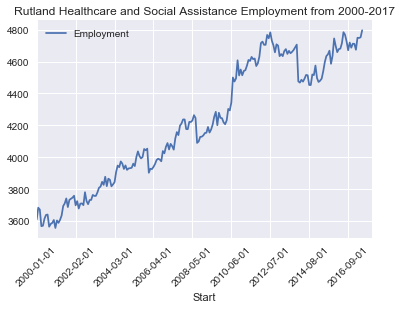

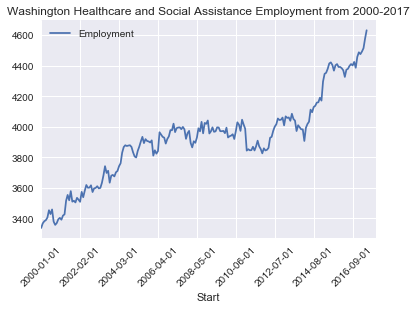

In [24]:
data1 = monthscnty[(monthscnty['County'] == 'Chittenden') & (monthscnty['Type'] == 'Health care and social assistance')]
data1 = data1.sort_values(by='Start')

data1.plot(x='Start', y='Employment')
plt.title ('Chittenden Healthcare and Social Assistance Employment from 2000-2017')
plt.xticks(rotation=45)

data2 = monthscnty[(monthscnty['County'] == 'Rutland') & (monthscnty['Type'] == 'Health care and social assistance')]
data2 = data2.sort_values(by='Start')
data2.plot(x='Start', y='Employment')
plt.title ('Rutland Healthcare and Social Assistance Employment from 2000-2017')
plt.xticks(rotation=45)

data3 = monthscnty[(monthscnty['County'] == 'Washington') & (monthscnty['Type'] == 'Health care and social assistance')]
data3 = data3.sort_values(by='Start')
data3.plot(x='Start', y='Employment')
plt.title ('Washington Healthcare and Social Assistance Employment from 2000-2017')
plt.xticks(rotation=45)

plt.show()

Unsurprisingly, there is no seasonality to Healthcare and Social Services as indicated by the charts below.

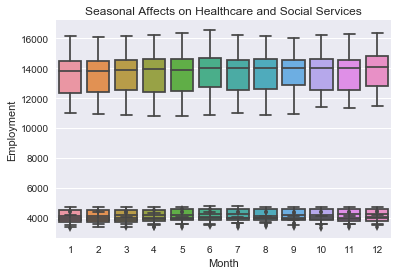

In [25]:
data1 = monthscnty[(monthscnty['County'] == 'Chittenden') & (monthscnty['Type'] == 'Health care and social assistance')]
sns.boxplot(x='Month_Number', y='Employment',  data=data1)

data2 = monthscnty[(monthscnty['County'] == 'Rutland') & (monthscnty['Type'] == 'Health care and social assistance')]
sns.boxplot(x='Month_Number', y='Employment', data=data2)

data3 = monthscnty[(monthscnty['County'] == 'Washington') & (monthscnty['Type'] == 'Health care and social assistance')]
sns.boxplot(x='Month_Number', y='Employment', data=data3)

plt.title ('Seasonal Affects on Healthcare and Social Services')
plt.xlabel('Month')
plt.show()

## Employment and Population

Recently I was working on Census Population for counties in Vermont. In order to understand growth it helps to put it in perspective of what percentage of the county is working in Healthcare, and proportionally which had the greatest growth. Since the census is only collected every 10 years, population from 2000 and 2010 were used.

In [26]:
pop = pd.read_csv("historicalpopulation.csv")
pop = pop[['County', 'Year','Population']].groupby(['County','Year'], as_index=False).sum().sort_values(by=['County'],ascending=0)
pop = pop[pop['Year'] >= 2000]

In [27]:
health = monthscnty[(monthscnty['Type'] == 'Health care and social assistance') & (monthscnty['Year'] == 2000) |  (monthscnty['Year'] == 2010)]
health = health[['County', 'Year','Employment']].groupby(['County','Year'], as_index=False).mean()

In [28]:
healthpop = pop.merge(health, how = 'outer', on = ['County', 'Year'])

healthpop = healthpop.sort_values(by='Employment', ascending=0)
healthpop['Perc'] = healthpop['Employment'] / healthpop['Population']

In [29]:
healthpop

,County,Year,Population,Employment,Perc
21,Chittenden,2010,156545.0,12072.325980,0.077117
20,Chittenden,2000,146571.0,11030.750000,0.075259
5,Washington,2010,59534.0,3904.281863,0.065581
7,Rutland,2000,63400.0,3611.916667,0.056970
6,Rutland,2010,61642.0,3548.575980,0.057568
3,Windham,2010,44513.0,3444.122024,0.077373
4,Washington,2000,58039.0,3394.000000,0.058478
0,Windsor,2010,56670.0,2919.741026,0.051522
25,Bennington,2010,37125.0,2705.172619,0.072867
24,Bennington,2000,36994.0,2597.916667,0.070225


Essex is the surpise in this case as the jump in percentage of the population is much larger. It is a small county so a small change would be a bit distorted but it is interesting to note.

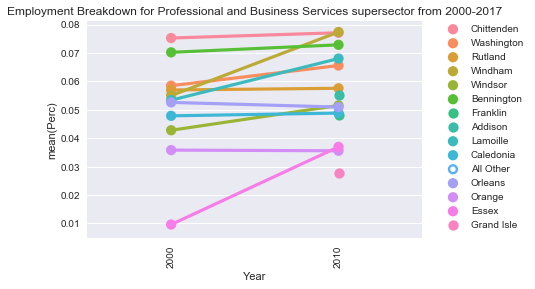

In [30]:
data = healthpop
sns.pointplot(x='Year', y='Perc', hue='County', data=data)
plt.title ('Employment Breakdown for Professional and Business Services supersector from 2000-2017')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## Information and Professional Services 

As someone who has worked in these fields, I was surprised how the field was not growing as I was expecting but instead actually shrinking or stagnating in the last couple of years. 

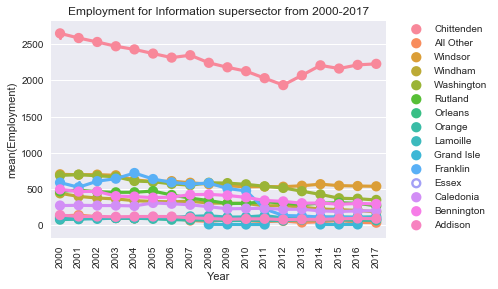

In [31]:
data = monthscnty[(monthscnty['Type'] == 'Information supersector')]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='County', data=data)
plt.title ('Employment for Information supersector from 2000-2017')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

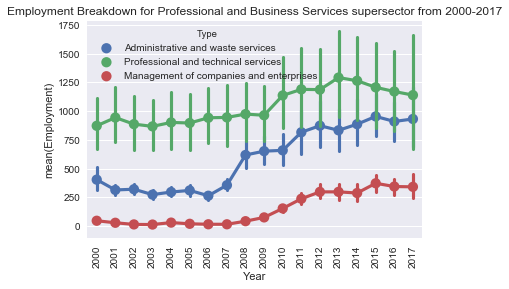

In [32]:
data = monthscnty[(monthscnty['Type'] == 'Professional and technical services') |
                  (monthscnty['Type'] == 'Management of companies and enterprises') |
                  (monthscnty['Type'] == 'Administrative and waste services')
                 ]
data = data.sort_values(by='Start')
sns.pointplot(x='Year', y='Employment', hue='Type', data=data)
plt.title ('Employment Breakdown for Professional and Business Services supersector from 2000-2017')
plt.xticks(rotation=90)
plt.show()


## Summary

There is a lot of information in these datasets and we touched only on the surface but from there a couple of interesting conclusions could be made. Healthcare and Social Services are the biggest, most consistant source of job growth for large and small counties. It seems to be resistant to recession, and given the aging population here, it will likely only grow in the future. Without digging into wage figures, it also looks like few industries in Vermont are growing but are more likely to remain at the same level or decline. An additional exploration of wages plus adding in tax and income information from another dataset will be coming in the future. Clone and explore!